# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

ID                             int64
OPEID                          int64
Institution Name              object
City                          object
State                         object
Foreign Gift Received Date     int64
Foreign Gift Amount            int64
Gift Type                     object
Country of Giftor             object
Giftor Name                   object
dtype: object 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Max value: 99999999
99th percentile: 7568696.199999988


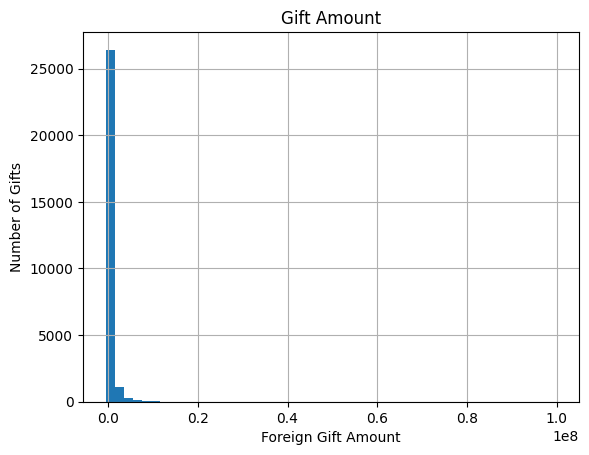

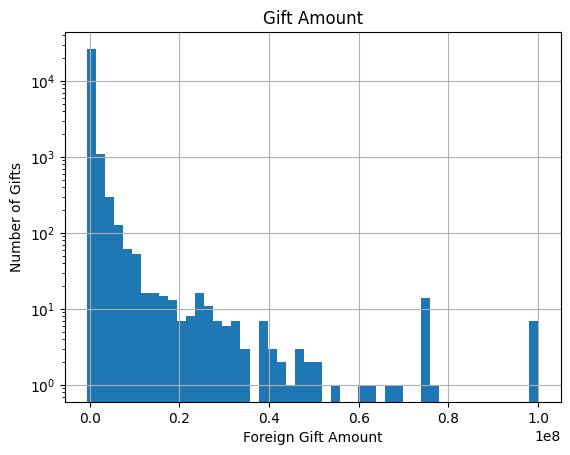

monetary proportion: 0.3875128450444704
contract proportion: 0.6120973742957372
real estate proportion: 0.00038978065979235324


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('/content/ForeignGifts_edu.csv',low_memory=False) #not sure if this is too big to load . . . it worked so i think its fine
print(df.dtypes, '\n') #also not sure but i think

print(df['Foreign Gift Amount'].describe())
print(f"Max value: {df['Foreign Gift Amount'].max()}")
print(f"99th percentile: {df['Foreign Gift Amount'].quantile(0.99)}")

#regular graph
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Gift Amount')
plt.show()


#Create foreign gift amount histogram and describe findings (log)
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Gift Amount')
plt.yscale('log')  # or plt.xscale('log') for log x-axis
plt.show()


#creat a histogram or value counts table of gift type, what proportion are contracts, real estate, and monetary gifts

counts = df['Gift Type'].value_counts()
monetary_proportion = counts['Monetary Gift'] / counts.sum()
contract_proportion = counts['Contract'] / counts.sum()
real_estate_proportion = counts['Real Estate'] / counts.sum()
print(f'monetary proportion: {monetary_proportion}')
print(f'contract proportion: {contract_proportion}')
print(f'real estate proportion: {real_estate_proportion}')
#Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?


#What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

#What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

#Which giftors provide the most money, in total?



1. When you first graph the histogram all of the values are clustered together at 0 and it appears those are the only monetary values that have gifts. Upon further investigation and finding the min and max of the data this occurs because most gifts are cheaper (under 500k) however there is a gift that is 100 million dollars. This outlier makes it difficult to see all the values. For this reason I graphed the histogram on a log scale that way it was easier to visualize all the values. You can see visually how in graph two you can better see all the values on it vs. graph one where it appears they are all around 0.

2. monetary proportion: 0.3875128450444704
contract proportion: 0.6120973742957372
real estate proportion: 0.00038978065979235324


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.